In [1]:
pip install yfinance==0.1.70

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
initial_data = yf.download("BNB-USD", start = "2021-04-01", end ="2022-04-01")
# downloading data from yahoo finance

[*********************100%***********************]  1 of 1 completed


In [4]:
initial_data.head()
# showing the first 5 data information

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-31,311.551422,316.486542,289.009277,302.063446,302.063446,3545493416
2021-04-01,302.245483,339.209106,301.588654,335.212891,335.212891,3718677616
2021-04-02,335.085968,356.783508,329.751373,339.007721,339.007721,3950524039
2021-04-03,338.909180,349.629913,319.193787,323.133514,323.133514,2953164849
2021-04-04,323.354858,353.434204,319.849030,351.624390,351.624390,3200674446


In [5]:
initial_data[['Adj Close']].head()

,Adj Close
Date,
2021-03-31,302.063446
2021-04-01,335.212891
2021-04-02,339.007721
2021-04-03,323.133514
2021-04-04,351.624390


In [6]:
data = initial_data[['Adj Close']]
data.head()

,Adj Close
Date,
2021-03-31,302.063446
2021-04-01,335.212891
2021-04-02,339.007721
2021-04-03,323.133514
2021-04-04,351.624390


In [10]:
data.tail()

,Adj Close
Date,
2022-03-27,430.503265
2022-03-28,430.390869
2022-03-29,434.505676
2022-03-30,442.684845
2022-03-31,428.916107


array([<AxesSubplot:xlabel='Date'>], dtype=object)

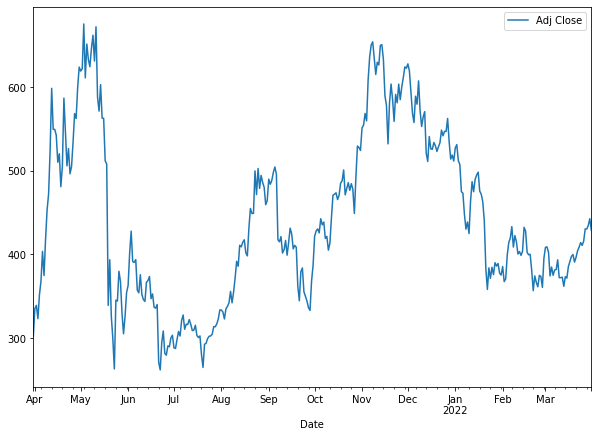

In [9]:
data.plot(figsize=(10,7), subplots = True)
#Plotting the movement of the stock

# Summary Statistics

In [8]:
data.describe().round(2)
# Showing the data description

,Adj Close
count,366.00
mean,441.70
std,100.48
min,261.82
25%,367.68
50%,418.57
75%,520.04
max,675.68


In [11]:
data.diff().head()

,Adj Close
Date,
2021-03-31,NaN
2021-04-01,33.149445
2021-04-02,3.794830
2021-04-03,-15.874207
2021-04-04,28.490875


In [12]:
data.diff().describe().round(2)

,Adj Close
count,365.00
mean,0.35
std,24.28
min,-169.00
25%,-10.04
50%,1.27
75%,12.94
max,82.36


In [13]:
data.pct_change().round(4).head()

,Adj Close
Date,
2021-03-31,NaN
2021-04-01,0.1097
2021-04-02,0.0113
2021-04-03,-0.0468
2021-04-04,0.0882


In [14]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Adj Close
Date,
2021-03-31,NaN
2021-04-01,0.1041
2021-04-02,0.0113
2021-04-03,-0.0480
2021-04-04,0.0845


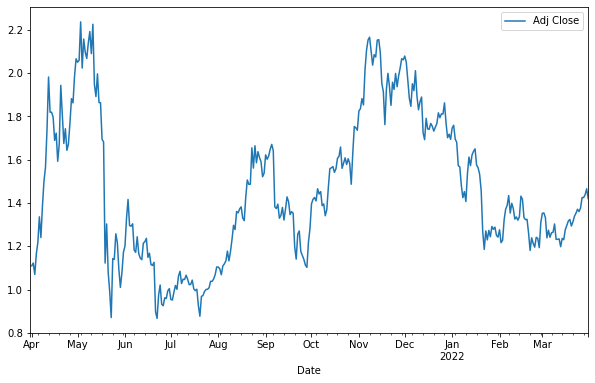

In [15]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

Volatility

In [16]:
log_return = np.log(initial_data['Adj Close'] / initial_data['Adj Close'].shift(1))
# calculating the volatility of the stock

In [17]:
vol = log_return.std()
# Daily Volatility
print('The Daily Volatility is', round(vol*100,2),'%')

The Daily Volatility is 5.64 %


In [18]:
vol = np.sqrt(252) * log_return.std()  
#annualised volatility
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 89.5 %


array([<AxesSubplot:xlabel='Date'>], dtype=object)

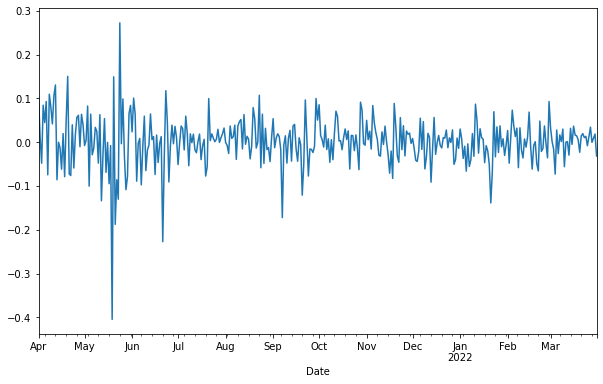

In [19]:
log_return.dropna(inplace=True) 
#volatility graph
log_return.plot(subplots=True, figsize=(10, 6))

In [20]:
last_six_vol = round(data['Adj Close'][125:].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The last six months volatility is', last_six_vol, '%')  
# last six months volatility

The last six months volatility is 65.22 %


In [22]:
first_six_vol = round(data['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The first six months volatility is', first_six_vol, '%') 
# first six months volatility   

The first six months volatility is 124.19 %


# BINOMIAL TREE

In [23]:
S = initial_data['Adj Close'][-1]
print('The spot price is', round(S,2))  
# getting the spot price

The spot price is 428.92


In [24]:
S0 = 428.92             # spot stock price
K = 410                 # strike price
T = 1/12                # time to maturity 
r = 1.72                # risk free rate 
sig = 0.89              # annaulised volatility
N = 4                   # number of time steps of the tree
payoff = "put"          # payoff 

In [25]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [26]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [27]:
S

array([[428.92      , 487.71482315, 554.56903087, 630.58737484,
        717.02604215],
       [  0.        , 377.21298937, 428.92      , 487.71482315,
        554.56903087],
       [  0.        ,   0.        , 331.73934381, 377.21298937,
        428.92      ],
       [  0.        ,   0.        ,   0.        , 291.74762093,
        331.73934381],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        256.57696595]])

In [28]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # probability of the price of underlying asset going up
q = 1.0 - p           # probability of the price of underlying asset going down
p

0.609540431207845

In [29]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         78.26065619],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        153.42303405]])

In [30]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 12.93195563,   4.18393606,   0.        ,   0.        ,
          0.        ],
       [  0.        ,  27.79666819,  11.10634571,   0.        ,
          0.        ],
       [  0.        ,   0.        ,  56.44889101,  29.48202678,
          0.        ],
       [  0.        ,   0.        ,   0.        , 103.82082197,
         78.26065619],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        153.42303405]])

In [31]:
print('European ' + payoff, str( V[0,0]))

European put 12.931955631944287


In [32]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 16.57902274,   4.6529622 ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,  36.74569455,  12.35138539,   0.        ,
          0.        ],
       [  0.        ,   0.        ,  78.26065619,  32.78701063,
          0.        ],
       [  0.        ,   0.        ,   0.        , 118.25237907,
         78.26065619],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        153.42303405]])

In [33]:
print('American ' + payoff, str( V[0,0]))

American put 16.57902273979963


# Monte Carlo 

In [34]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [35]:
T = 1/12
r = 1.72
sigma = 0.89
S0 = 428.92
K = 410


In [36]:
S = mcs_simulation_np(1000)

In [37]:
S = np.transpose(S)

In [38]:
S

array([[428.92      , 428.50339839, 427.16978053, ..., 619.72605829,
        618.30597935, 620.73724567],
       [428.92      , 431.57742671, 428.67142758, ..., 453.35255316,
        453.27588752, 451.87209645],
       [428.92      , 431.65396061, 430.46478713, ..., 407.24754693,
        407.55099662, 411.19827196],
       ...,
       [428.92      , 429.49392451, 438.64605272, ..., 539.38562435,
        542.66463359, 541.73155536],
       [428.92      , 433.09200549, 431.15975723, ..., 291.84580295,
        294.8247835 , 295.41191032],
       [428.92      , 433.09517658, 436.92229241, ..., 437.81754179,
        438.88890903, 437.64983958]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values of BNB-USD')

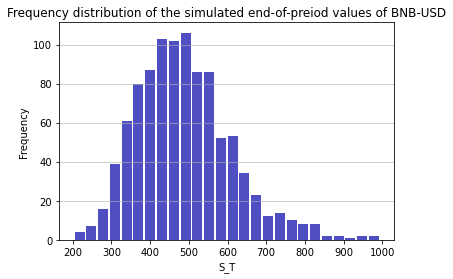

In [39]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values of BNB-USD')

In [40]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 16.174289410199634


In [41]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 93.82749926528577


# Greeks

# Delta

In [42]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [43]:
delta(428.92, 450, 1/12, 1.72, 0, 0.89, 'call')

0.6913252833528576

In [44]:
delta(428.92, 410, 1/12, 1.72, 0, 0.89, 'put')

-0.1943598533570678

In [45]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 428.92, 450, 1/12, 1.72, 0.89,  'call')
    Delta_Put [i] = delta(S[i], 428.92, 410, 1/12, 1.72, 0.89,  'put')

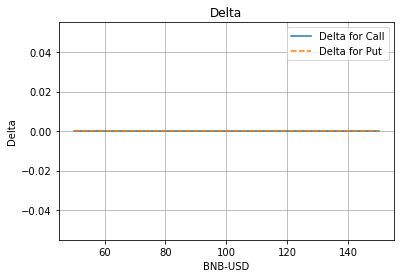

In [46]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('BNB-USD')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [80]:
S = np.linspace(50, 170, 51)
T = np.linspace(0.01, 0.31, 31)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 428.92, T[i], 1.72, 0, 0.89, 'call')

C:\Users\w1869\AppData\Local\Temp/ipykernel_2460/1617169925.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


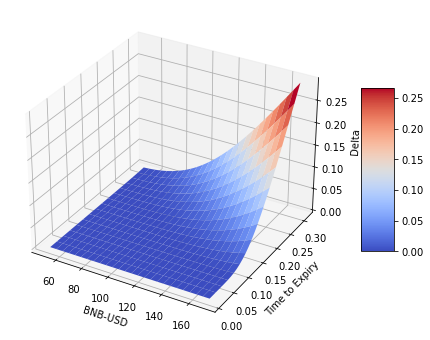

In [81]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB-USD')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

In [48]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [49]:
gamma(428.92, 450, 1/12, 1.72, 0, 0.895, 'call')

0.0031797430178733795

In [50]:
gamma(428.92, 410, 1/12, 1.72, 0, 0.895, 'put')

0.0024902019734050367

In [51]:
S = np.linspace(50,170,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],  450, 1/12, 1.72, 0, 0.895, 'call')

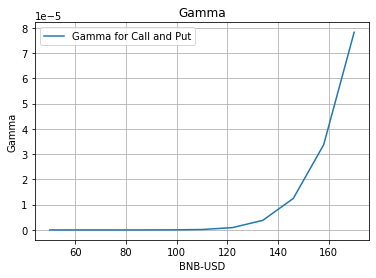

In [52]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('BNB-USD')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

# Surface of Gamma

In [53]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma


In [54]:
S = np.linspace(50, 170, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 450, T[i], 1.72, 0, 0.89, 'call')

C:\Users\w1869\AppData\Local\Temp/ipykernel_2460/2222326659.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


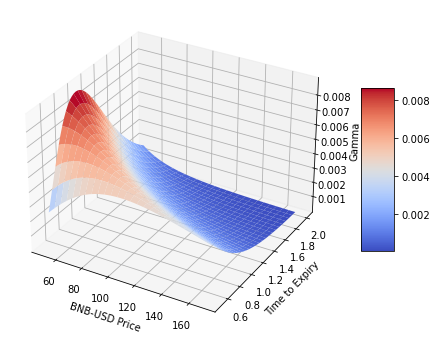

In [55]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB-USD Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed

In [56]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [57]:
speed(428.92, 450, 1/12, 1.72, 0, 0.895, 'call')

-6.267179795259835e-06

In [58]:
speed(428.92, 410, 1/12, 1.72, 0, 0.895, 'put')

-7.245379049177665e-06

In [59]:
S = np.linspace(50,170,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 410, 1/12, 1.72, 0, 0.895, 'call')

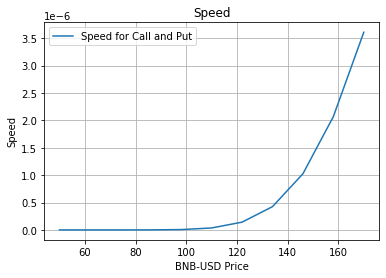

In [60]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('BNB-USD Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

# Surface of Speed

In [61]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [62]:
S = np.linspace(50, 170, 101)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 450, T[i], 1.72, 0, 0.89, 'call')

C:\Users\w1869\AppData\Local\Temp/ipykernel_2460/649176208.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


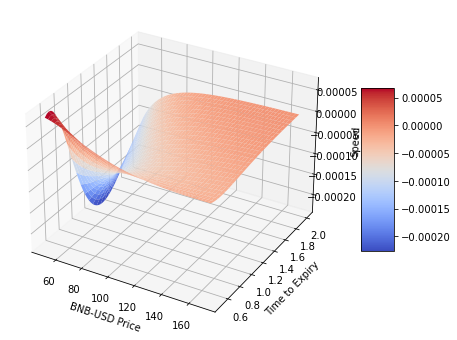

In [63]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB-USD Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

In [64]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [65]:
theta(428.92, 450, 1/12, 1.72, 0, 0.895, 'call')

633.188762752979

In [66]:
theta(428.92, 410, 1/12, 1.72, 0, 0.895, 'put')

351.02237613223616

In [67]:
T = np.linspace(1,31,31)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(428.92, 450, T[i], 1.72, 0, 0.89, 'call')
    Theta_Put [i] = theta(428.92, 410, T[i], 1.72, 0, 0.89, 'put')

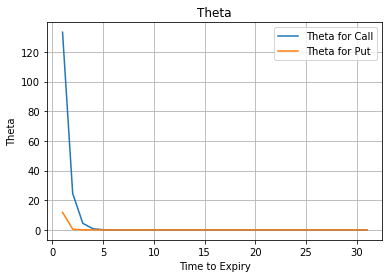

In [68]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

# Surface of Theta

In [69]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [70]:
S = np.linspace(50, 170, 101)
T = np.linspace(1, 31, 31)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 450, T[i], 1.72, 0, 0.89, 'call')

C:\Users\w1869\AppData\Local\Temp/ipykernel_2460/2515623853.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


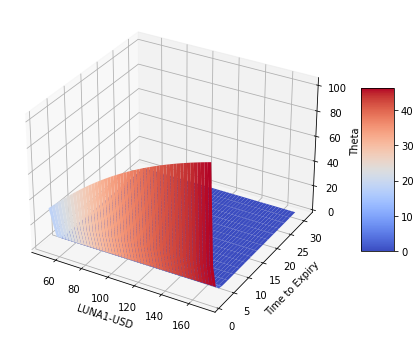

In [71]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('LUNA1-USD')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

In [72]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [73]:
rho(428.92, 450, 1/12, 1.72, 0, 0.895, 'call')

19.326309060164558

In [74]:
rho(428.92, 450, 1/12, 1.72, 0, 0.895, 'put')

-13.16613590309211

In [75]:
r = np.linspace(0,0.1,50)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(428.92, 450, 1/12, r[i], 0, 0.89, 'call')
    Rho_Put [i] = rho(428.92, 410, 1/12, r[i], 0, 0.89, 'put')

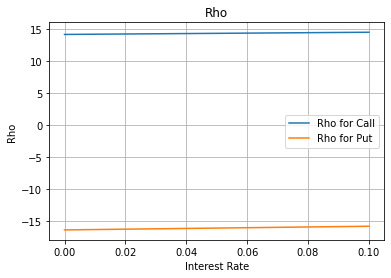

In [76]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

# Surface of Rho

In [77]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [78]:
S = np.linspace(50, 170, 101)
T = np.linspace(0.5, 2, 101)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 450, T[i], 1.72, 0, 0.89, 'call')

C:\Users\w1869\AppData\Local\Temp/ipykernel_2460/1418007803.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


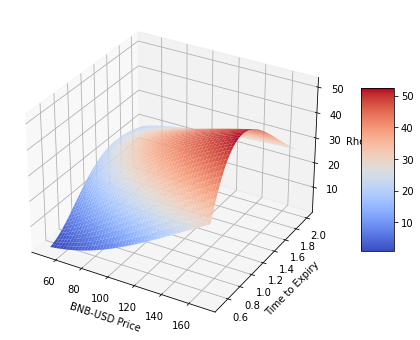

In [79]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB-USD Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);